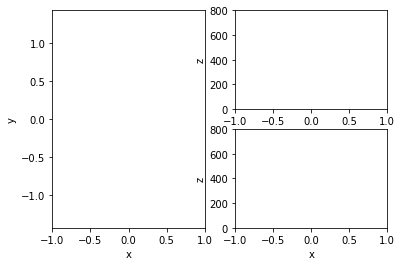

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation


class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
# ani.save('test_sub.mp4')
plt.show()

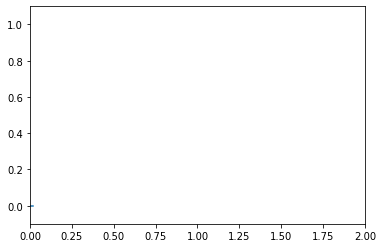

In [3]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class Scope(object):
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)

fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=10,
                              blit=True)


plt.show()